# Dask Array (2)

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Dask"
* https://docs.dask.org/en/latest/array.html
* https://gregorygundersen.com/blog/2018/12/10/svd/
* https://en.wikipedia.org/wiki/Cosine_similarity
* https://en.wikipedia.org/wiki/Adjacency_matrix
* https://en.wikipedia.org/wiki/Pairing_function#Cantor_pairing_function
* https://image.dask.org/en/latest/
* https://www.youtube.com/watch?v=-AuwMJAqjJc

## Задачи для совместного разбора

1. Создайте матрицу 100_000x1000 случайных чисел из нормального распределения. Получите SVD-разложение матрицы. Проверьте, что векторы $u_j, j>1$ ортогональны $u_0$. Вычислите длины левых сингулярных векторов.

In [15]:
import dask.array as da

a = da.random.standard_normal((100_000, 100))
a
# a = u @ s @ v.T

dask.array<standard_normal, shape=(100000, 100), dtype=float64, chunksize=(100000, 100), chunktype=numpy.ndarray>

In [16]:
u, s, vh = da.linalg.svd(a)
u.shape, s.shape, vh.shape

((100000, 100), (100,), (100, 100))

In [3]:
(u[:,0] @ u[:,1]).compute() 

array(-1.06208445e-15)

In [5]:
(u[:,0] @ u).compute() # ортогональность

array([ 1.00000000e+00, -1.05124243e-15, -2.62810607e-16, -1.16009632e-17,
       -1.43873628e-16,  3.30898503e-16, -4.11454724e-17, -2.95445092e-17,
        5.69206141e-17,  5.68121938e-17,  2.45571792e-17, -1.08420217e-17,
       -5.05509263e-17,  2.35326082e-16,  1.34332649e-16,  7.82793969e-17,
       -2.15539392e-16,  1.57642996e-16, -3.09864981e-16, -3.40439482e-17,
       -2.60208521e-18, -2.81892565e-17, -2.24971951e-17, -4.25007252e-17,
       -8.02309608e-17, -2.49366500e-17, -3.45860493e-17, -2.19008839e-17,
        9.38919081e-17,  1.31513724e-16, -9.49761103e-17,  1.17026072e-16,
        7.01207755e-17,  1.16118053e-16, -1.80736502e-16,  9.08561421e-17,
        8.06781942e-17, -2.44487590e-17,  1.42897846e-16, -1.20661537e-16,
        1.82145965e-17,  1.42464165e-16,  1.69135539e-17,  1.30104261e-16,
        7.37257477e-18,  3.64291930e-17,  4.31512465e-17,  1.28152697e-16,
        3.94649591e-17,  4.31512465e-17, -1.33627918e-17,  8.54351312e-17,
        4.77048956e-17,  

In [6]:
da.linalg.norm(u, axis=0).compute()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

2. Сгенерируйте вектор `a` размера 10, заполненный числами из нормального распределения. Пусть `b := -a`. Вычислите косинусное сходство двух этих векторов. Вычислите косинусное сходство каждой пары правых сингулярных векторов из задачи 1.

$$\text{similarity} = \cos(\theta) = {A \cdot B \over \|A\| \|B\|} = \frac{ \sum\limits_{i=1}^{n}{A_i \times B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{(A_i)^2}} \times \sqrt{\sum\limits_{i=1}^{n}{(B_i)^2}} }$$

In [12]:
a = da.random.standard_normal(10)
b = -a

cos = (a @ b) / (da.linalg.norm(a) * da.linalg.norm(b))
cos.compute()

-1.0

In [18]:
(vh @ vh.T).compute() # почти единичная

array([[ 1.00000000e+00,  1.22815955e-16,  8.90687904e-17, ...,
        -7.04229755e-17, -8.10995642e-17, -1.02198809e-16],
       [ 1.22815955e-16,  1.00000000e+00,  6.04669924e-17, ...,
         2.62134907e-17,  4.74868424e-17,  3.89886931e-16],
       [ 8.90687904e-17,  6.04669924e-17,  1.00000000e+00, ...,
        -9.63301252e-17,  1.74453595e-16, -2.99915279e-16],
       ...,
       [-7.04229755e-17,  2.62134907e-17, -9.63301252e-17, ...,
         1.00000000e+00,  1.28705800e-16, -4.44119927e-17],
       [-8.10995642e-17,  4.74868424e-17,  1.74453595e-16, ...,
         1.28705800e-16,  1.00000000e+00,  3.58543115e-16],
       [-1.02198809e-16,  3.89886931e-16, -2.99915279e-16, ...,
        -4.44119927e-17,  3.58543115e-16,  1.00000000e+00]])

In [19]:
# в заданиях нужно нормировать

3\. Загрузите изображения из каталога `imgs` при помощи пакета `dask_image`. Визуализируйте одно изображение в цвете и в оттенках серого. Отразите изображение по горизонтали. Визуализируйте исходный и преобразованных вариант на одном рисунке

In [20]:
#!pip install dask-image

  Created wheel for pims: filename=PIMS-0.6.1-py3-none-any.whl size=83692 sha256=8c7a4e74098d770d4306e3b5695a4df83269f72218b068bf79cb2d367e8c0426
  Stored in directory: c:\users\cosit\appdata\local\pip\cache\wheels\c8\51\78\e8155864f53ff0c9e01fe656f64b55712ba60fb2a451757505
Successfully built pims


In [22]:
import dask_image
from dask_image.imread import imread

In [23]:
imgs = imread('imgs/*.jpg')
imgs

dask.array<_map_read_frame, shape=(11, 512, 384, 3), dtype=uint8, chunksize=(1, 512, 384, 3), chunktype=numpy.ndarray>

(512, 384, 3)


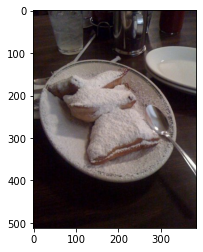

In [26]:
import matplotlib.pyplot as plt

img = imgs[0].compute()
print(img.shape)
plt.imshow(img);

(512, 384)


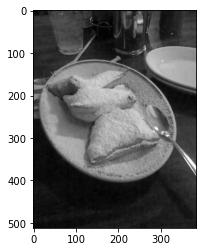

In [31]:
img_g = imgs[0, :, :, 0]
print(img_g.shape)
plt.imshow(img_g, cmap='gray');

In [34]:
from dask_image.ndinterp import affine_transform
import numpy as np

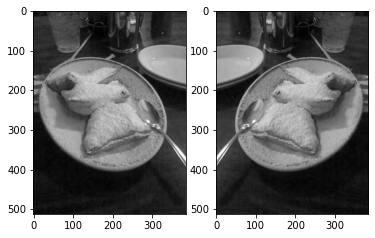

In [37]:
reflection_matrix = np.array([[1, 0, 0],
                              [0, -1, img_g.shape[1]-1],
                              [0, 0, 1]])
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img_g, cmap='gray')
axs[1].imshow(
    affine_transform(img_g, reflection_matrix),
    cmap='gray'
);

## Лабораторная работа 8

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy`, `pandas` и `dask`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy`, структур `pandas` или структур `dask` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

В ходе выполнения все операции вычислений (расчет средних значений, расчет косинусной близости и т.д.) проводятся над `dask.array` и средствами пакета `dask` (и `dask_image`), если в задании не сказано обратного. Переход от `dask.array` к `numpy.array` или `pd.DataFrame` возможен исключительно для демонстрации результата в конце решения задачи. Если в задаче используются результаты выполнения предыдущих задач, то подразумевается, что вы используете результаты в виде `dask.array` (то есть то, что было получено до вызова `compute`, а не после).

In [37]:
import dask.array as da

<p class="task" id="1"></p>

1\. Сингулярным разложением (SVD) матрицы $A$ размера $M\times N$ называется разложение вида $A = USV^\top$, где $U$ - матрица размера $M\times N$  ортонормированных собственных векторов произведения $AA^\top$, $V^T$ - транспонированная матрица размера $N\times N$ ортонормированных собственных  векторов произведения $A^\top A$, $S$ - диагональная матрица сингулярных значений размера $N\times N$.

SVD может быть использовано для понижения размерности векторов. Для этого от матрицы $U$ оставляют первые $k$ столбцов $U_{\cdot,:k}$, от матрицы $S$ оставляют левый верхний квадрат размера $k\times k$ $S_{:k,:k}$ и вычисляется произведение $\hat{A} = U_{\cdot,:k}S_{:k,:k}$

Выберите эмбеддинги тех рецептов, которые относятся к группе с номеров 3 (файл `recipe_embeddings.h5`), и уменьшите их размерность до 64 при помощи реализации алгоритма SVD из пакета `dask.array.linalg`. Выведите количество строк и столбцов полученного массива.

Примечание: после отбора рецепта, принадлежащих третьей группе, вызовите у полученного массива метод `compute_chunk_sizes`, чтобы `dask` обновил метаинформацию в этом массиве. 

In [1]:
import h5py

In [3]:
fp = h5py.File("recipe_embeddings.h5")
embeddings = fp["embeddings"]
emb = da.array(embeddings)
mask = da.array(fp["mask"])

In [124]:
fp.close()

In [4]:
group_3 = emb[mask == 3]
group_3.compute_chunk_sizes()

dask.array<getitem_variadic, shape=(10000, 312), dtype=float32, chunksize=(921, 312), chunktype=numpy.ndarray>

In [5]:
u, s, vt = da.linalg.svd(group_3)
u.shape, s.shape, vt.shape

((10000, 312), (312,), (312, 312))

In [6]:
u_ = u[:,:64]

In [7]:
u_.shape

(10000, 64)

In [8]:
s_ = da.diag(s)[:64:,:64]

In [9]:
s_.shape

(64, 64)

In [10]:
group_3_ = u_ @ s_

In [11]:
group_3_.shape

(10000, 64)

In [12]:
group_3_

dask.array<getitem, shape=(10000, 64), dtype=float32, chunksize=(921, 64), chunktype=numpy.ndarray>

<p class="task" id="2"></p>

2\. Используя эмбеддинги уменьшенной размерности, полученные в задании 1, посчитайте косинусное сходство между каждой парой рецептов третьей группы. Выведите матрицу косинусного сходства на экран.

In [67]:
normed_gr = group_3_ / da.linalg.norm(group_3_, axis=1, keepdims=True)
cosine = normed_gr @ normed_gr.T
print(cosine.compute())

C:\Users\cosit\AppData\Roaming\Python\Python39\site-packages\dask\array\routines.py:443: PerformanceWarning: Increasing number of chunks by factor of 12
  out = blockwise(


[[1.         0.77996168 0.70962796 ... 0.78566267 0.72498317 0.70748971]
 [0.77996168 1.         0.64223848 ... 0.86709915 0.61588674 0.6534426 ]
 [0.70962796 0.64223848 1.         ... 0.64595636 0.87130851 0.87150259]
 ...
 [0.78566267 0.86709915 0.64595636 ... 1.         0.64296769 0.66372944]
 [0.72498317 0.61588674 0.87130851 ... 0.64296769 1.         0.91261626]
 [0.70748971 0.6534426  0.87150259 ... 0.66372944 0.91261626 1.        ]]


<p class="task" id="3"></p>

3\. Используя результат задания 2, посчитайте и выведите на экран количество рецептов, для которых рецепт с индексом `242` входит число топ-5 ближайших рецептов в смысле косинусной близости. При поиске топ-5 рецептов для конкретного рецепта считайте, что он сам в это число не входит.

In [71]:
top5 = cosine.argtopk(6, axis=0)[1:, :]
(top5 == 242).sum().compute()

8

<p class="task" id="4"></p>

4\. Графом называется совокупность двух множеств $G=(V,E)$: множества $V=\{v_1, ..., v_M\}$ узлов и множества ребер $E=\{(v_i, v_j)|v_i\in V, v_j\in V\}$, соединяющих эти узлы. Матрицей смежности невзвешенного графа называется квадратная матрица $A=[a_{ij}]$, в которой ${a_{ij}}$ обозначает количество ребер, соединяющих вершины $i$ и $j$.

Постройте матрицу смежности для графа рецептов на основе матрицы косинусного сходства между каждой парой рецептов. Будем считать, что между двумя рецептами в этом графе существует ребро, если косинусное сходство между двумя этими рецептами не менее 0.85. Петли (ребра из вершины в саму в себя) в графе должны отсутствовать. Посчитайте и выведите на экран количество ребер в данном графе. Проверьте, является ли полученная матрица смежности симметричной.

Примечание: считайте, что два различных рецепта не могут иметь косинусное сходство, равное 1.

In [119]:
cosine_ = cosine.reshape(len(cosine)**2)
cosine_[::len(cosine) + 1] = 0
cosine_ = cosine_.reshape(10_000, 10_000)
adj_m = (cosine_ >= 0.85).astype(int)
adj_m.compute()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 0]])

In [120]:
da.sum(adj_m).compute()

23832776

In [123]:
sym = da.allclose(adj_m, adj_m.transpose())
sym.compute()

C:\Users\cosit\AppData\Roaming\Python\Python39\site-packages\dask\array\core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 144
  result = blockwise(


True

<p class="task" id="5"></p>

5\. В файле `authors_info.hdf5` хранятся два датасета, содержащие информацию возрасте человека и количестве рецептов, оставленных этим человеком. Построите тепловую карту, где по горизонтальной оси откладываются значения количества рецептов, по вертикальной оси - значения количества лет, а на пересечении строк и столбцов указано количество раз, когда человек данного возраста оставил данное кол-во рецептов.

Подсказка: для подсчета количества каждой пары вы можете использовать функцию `da.bincount`. Эта функция не может работать с двумерными массивами, но вы можете закодировать каждую пару уникальным целым числом, например при помощи [этой функции](https://en.wikipedia.org/wiki/Pairing_function#Cantor_pairing_function).

In [134]:
fp = h5py.File("authors_info.hdf5")
#fp.keys()
age = da.array(fp['age'])
num_recipes = da.array(fp['num_recipes'])

In [139]:
codes =  (0.5 * (age + num_recipes) * (age + num_recipes + 1) + num_recipes).astype('int')
bins = da.bincount(codes)

In [140]:
import matplotlib.pyplot as plt

In [201]:
import seaborn as sns

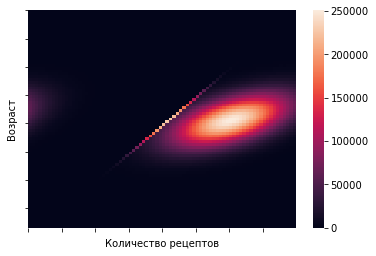

In [203]:
codes = age * num_recipes.max() + num_recipes
counts = da.bincount(codes, minlength=(age.max() + 1) * (num_recipes.max() + 1))
counts = counts.reshape((age.max() + 1, num_recipes.max() + 1))

sns.heatmap(counts)
plt.xlabel('Количество рецептов')
plt.ylabel('Возраст')
plt.xticks(range(0, num_recipes.max() + 1, 10))
plt.yticks(range(0, age.max() + 1, 10));

<p class="task" id="6"></p>

6\. В архиве `food` находятся фотографии блюд. Удалите все изображения кроме тех, которые имеют размер 512x512. Загрузите изображения в виде массива `dask.array` при помощи пакета `dask_image`. Выведите на экран основную информацию о полученном массиве. Вычислите среднюю интенсивность трех цветов для каждого пикселя каждого изображения. Полученный трехмерный массив далее интерпретируйте как черно-белые изображения. Визуализируйте одно полученное изображение в черно-белой палитре.

In [2]:
import dask_image
from dask_image.imread import imread

In [3]:
import os

In [198]:
path = 'food'

file_names = os.listdir(path)

for name in file_names:
    imgs = imread(f'food/{name}/*.jpg')
    paths = os.listdir(f'food/{name}')
    zips = list(zip(imgs, paths))
    
    for img in zips:
        if img[0].shape != (512, 512, 3):
            os.remove(f'food/{name}/{img[1]}')

In [218]:
for name in file_names:
    if os.stat(f'food/{name}').st_size: 
        print(f'food/{name}')

food/beet_salad


In [4]:
imgs = imread('food/beet_salad/*.jpg')
imgs

dask.array<_map_read_frame, shape=(443, 512, 512, 3), dtype=uint8, chunksize=(1, 512, 512, 3), chunktype=numpy.ndarray>

In [11]:
grey_arr = imgs.mean(axis=3)
grey_arr

dask.array<mean_agg-aggregate, shape=(443, 512, 512), dtype=float64, chunksize=(1, 512, 512), chunktype=numpy.ndarray>

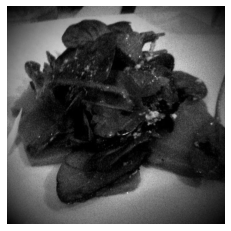

In [262]:
plt.imshow(grey_arr[0], cmap='gray')
plt.axis('off')
plt.show()

<p class="task" id="7"></p>

7\. Добавьте на изображения шум. Для этого сгенерируйте массив, состоящий из нулей и единиц, в котором доля нулей составляет 15%. Выведите на экран среднее значение сгенерированного массива.

Поэлементно умножьте этот массив на каждое черно-белое изображение. На одном рисунке визуализируйте изображение до и после добавления шума. Постройте гистограммы интенсивности пикселей до и после добавления шума.

In [38]:
nums = da.random.choice([0, 1], size=len(grey_arr[0]), p=[.15, 1 - .15])
nums.mean().compute()

0.837890625

In [39]:
new_grey = grey_arr * nums

In [40]:
from dask_image.ndinterp import affine_transform
import numpy as np

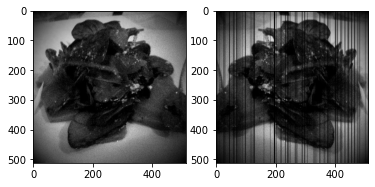

In [43]:
reflection_matrix = np.array([[1, 0, 0],
                              [0, -1, new_grey[2].shape[1]-1],
                              [0, 0, 1]])
fig, axs = plt.subplots(1, 2)
axs[0].imshow(grey_arr[0], cmap='gray')
axs[1].imshow(
    affine_transform(new_grey[0], reflection_matrix), cmap='gray'
);

In [52]:
new_grey[0].ravel().compute()

array([0.        , 0.        , 0.        , ..., 1.66666667, 1.        ,
       1.        ])

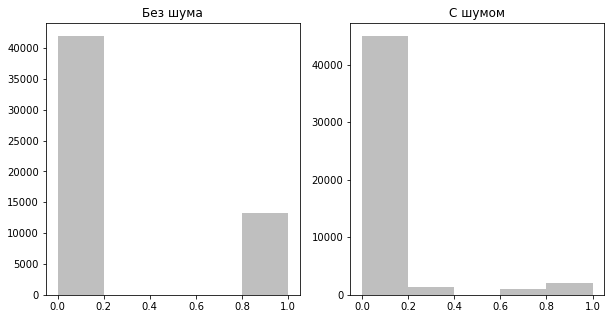

In [56]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].hist(imgs[0].ravel().compute(), bins=5, range=(0.0, 1.0), color='gray', alpha=0.5)
ax[0].set_title('Без шума')

ax[1].hist(new_grey[0].ravel().compute(), bins=5, range=(0.0, 1.0), color='gray', alpha=0.5)
ax[1].set_title('С шумом');

<p class="task" id="8"></p>

8\. Примените фильтр Гаусса из пакета `dask_image.ndfilters` к черно-белым изображениям. На одном рисунке визуализируйте изображение до и после применения фильтра. Исследуйте, как влияют значения `sigma` и `truncate` на результат. Проверьте не менее трех комбинаций этих параметров.

In [9]:
from dask_image import ndfilters
import matplotlib.pyplot as plt

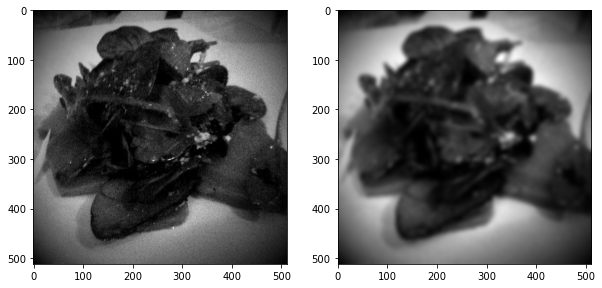

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

gauss = dask_image.ndfilters.gaussian_filter(grey_arr[0], sigma=4, truncate=2)
axs[0].imshow(grey_arr[0], cmap='gray')
axs[1].imshow(gauss, cmap='gray');

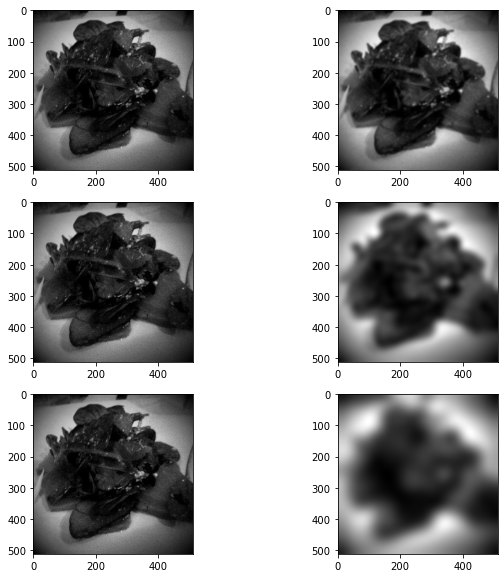

In [29]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
k = 0

for i in [2, 10, 20]:
    gauss = dask_image.ndfilters.gaussian_filter(grey_arr[0], sigma=i, truncate=2)
    axs[k][0].imshow(grey_arr[0], cmap='gray')
    axs[k][1].imshow(gauss, cmap='gray');
    k += 1

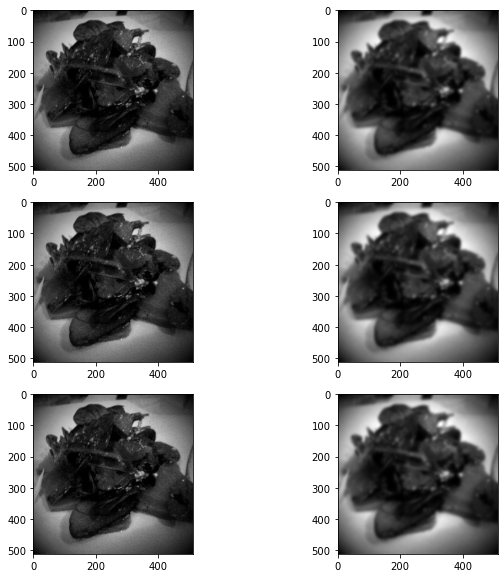

In [30]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
k = 0

for i in [2, 10, 20]:
    gauss = dask_image.ndfilters.gaussian_filter(grey_arr[0], sigma=4, truncate=i)
    axs[k][0].imshow(grey_arr[0], cmap='gray')
    axs[k][1].imshow(gauss, cmap='gray');
    k += 1

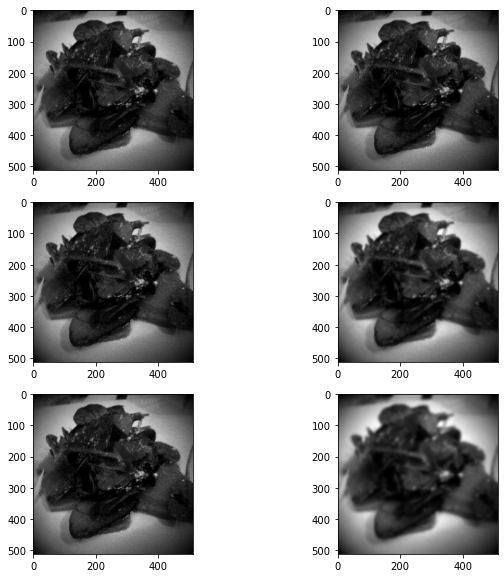

In [31]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
k = 0

for i in [2, 10, 20]:
    gauss = dask_image.ndfilters.gaussian_filter(grey_arr[0], sigma=i//5, truncate=i)
    axs[k][0].imshow(grey_arr[0], cmap='gray')
    axs[k][1].imshow(gauss, cmap='gray');
    k += 1